In [88]:
import numpy as np
import pandas as pd

# Read the data

In [89]:
data=pd.DataFrame()
data=pd.read_pickle('data-vna.pkl')

In [90]:
data.head()

,text,label,split,ind
0,associate circle .D. Jr. 845-41-54-4 ...,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1]","[associate, circle, year, old, pound, gentlema...","[552, 1419, 9356, 5815, 6504, 3301, 7026, 1691..."
1,MERCY care CENTER associate AR 72985 M...,"[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]","[mercy, care, center, associate, come, further...","[5059, 1169, 1289, 552, 1575, 3213, 2786, 4334..."
2,Personal Overall be 81 yr\nold male present...,"[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]","[personal, overall, old, male, present, multip...","[6245, 5963, 5815, 4901, 6576, 5334, 8531, 286..."
3,"HUNTINGTON EMERGENCY DEPT visit THOMAS-YOSEF,J...","[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]","[huntington, emergency, dept, visit, julium, v...","[3831, 2586, 2073, 9082, 4419, 9082, 1953, 612..."
4,JENNIFER BOOKER LC Unit No NASHUA MEMORIAL HOS...,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]","[jennifer, booker, unit, nashua, memorial, hos...","[4393, 942, 8808, 5427, 5040, 3779, 144, 1953,..."


# Compute the size of Vocab and text

In [91]:
import nltk
from sklearn import preprocessing
we = preprocessing.LabelEncoder()
pstemmer = nltk.lancaster.LancasterStemmer()

vocab  = set([pstemmer.stem(i) for x in data.split for i in x])

In [92]:
len(vocab)

9426

In [93]:
a=data.ind.map(lambda x: len(x))

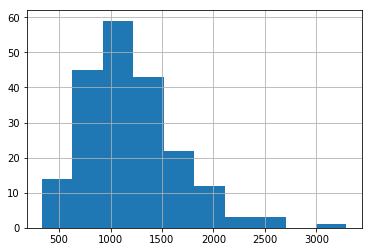

In [94]:
a.hist()

# Labels Dist

0. ABDOMINAL--------- 38.50
1. ADVANCED-CAD------ 62.50
2. ALCOHOL-ABUSE-----  3.50
3. ASP-FOR-MI-------- 81.00
4. CREATININE-------- 41.00
5. DIETSUPP-2MOS----- 52.50
6. DRUG-ABUSE--------  6.00
7. ENGLISH----------- 96.00
8. HBA1C------------- 33.50
9. KETO-1YR----------  0.50
10. MAJOR-DIABETES---- 56.50
11. MAKES-DECISIONS--- 97.00
12. MI-6MOS-----------  9.00


### picking the label with almost 50/50 dist

In [95]:
data['diet']=data.label.map(lambda x: x[5])

### Creating Train data

In [96]:
#data=data.sample(frac=0.5)
train=data.sample(frac=0.8)
test=data.drop(train.index)

train.shape, test.shape

((162, 5), (40, 5))

In [97]:
from keras.preprocessing import sequence

data['lens'] = data.ind.map(lambda x: len(x))
maxlen = max(data.lens)
data = data[data.lens != 0]
maxlen

3293

In [98]:
X_train = sequence.pad_sequences(train.ind, maxlen=maxlen)
X_train = np.array([x.ravel() for x in X_train])

In [99]:
y_train = np.array([x for x in train.diet])
y_train

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0], dtype=int64)

# Creating NN Model

In [100]:
import numpy
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.layers import Dropout
from keras.preprocessing import sequence
import numpy as np
import random

model = Sequential()
model.add(Embedding(len(vocab), maxlen, input_length=X_train.shape[1]))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 3293, 3293)        31039818  
_________________________________________________________________
dense_17 (Dense)             (None, 3293, 100)         329400    
_________________________________________________________________
dropout_9 (Dropout)          (None, 3293, 100)         0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 31,449,719
Trainable params: 31,449,719
Non-trainable params: 0
_________________________________________________________________
None


# Training the Model

In [101]:
model.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
162/162 [==============================] - 172s 1s/step - loss: 0.9978 - acc: 0.4938
Epoch 2/10
162/162 [==============================] - 174s 1s/step - loss: 0.8715 - acc: 0.5309
Epoch 3/10
162/162 [==============================] - 173s 1s/step - loss: 0.6712 - acc: 0.5062
Epoch 4/10
162/162 [==============================] - 172s 1s/step - loss: 0.5197 - acc: 0.8765
Epoch 5/10
162/162 [==============================] - 160s 985ms/step - loss: 0.3678 - acc: 0.9012
Epoch 6/10
162/162 [==============================] - 166s 1s/step - loss: 0.2852 - acc: 0.8889
Epoch 7/10
162/162 [==============================] - 165s 1s/step - loss: 0.1589 - acc: 0.9568
Epoch 8/10
162/162 [==============================] - 167s 1s/step - loss: 0.2089 - acc: 0.9136
Epoch 9/10
162/162 [==============================] - 165s 1s/step - loss: 0.2468 - acc: 0.9198
Epoch 10/10
162/162 [==============================] - 169s 1s/step - loss: 0.1349 - acc: 0.9506


# Creating the Test Set

In [102]:
X_test = sequence.pad_sequences(test.ind, maxlen=maxlen)
X_test = np.array([x.ravel() for x in X_test])

In [103]:
Y_test = np.array([x for x in test.diet])
Y_test

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

# Testing the Model for Accuracy

In [104]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.863621711731
Test accuracy: 0.65


In [106]:
data['diabet']=data.label.map(lambda x: x[10])

In [107]:
data

,text,label,split,ind,diet,lens,diabet
0,associate circle .D. Jr. 845-41-54-4 ...,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1]","[associate, circle, year, old, pound, gentlema...","[552, 1419, 9356, 5815, 6504, 3301, 7026, 1691...",1,1921,1
1,MERCY care CENTER associate AR 72985 M...,"[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]","[mercy, care, center, associate, come, further...","[5059, 1169, 1289, 552, 1575, 3213, 2786, 4334...",0,404,0
2,Personal Overall be 81 yr\nold male present...,"[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]","[personal, overall, old, male, present, multip...","[6245, 5963, 5815, 4901, 6576, 5334, 8531, 286...",1,743,1
3,"HUNTINGTON EMERGENCY DEPT visit THOMAS-YOSEF,J...","[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]","[huntington, emergency, dept, visit, julium, v...","[3831, 2586, 2073, 9082, 4419, 9082, 1953, 612...",0,763,0
4,JENNIFER BOOKER LC Unit No NASHUA MEMORIAL HOS...,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]","[jennifer, booker, unit, nashua, memorial, hos...","[4393, 942, 8808, 5427, 5040, 3779, 144, 1953,...",1,808,1
5,Dr. doctor RE TUTTLE DOB Dr. thank...,"[0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1]","[doctor, tuttle, dob, thank, refer, understand...","[2308, 8688, 2305, 8373, 7026, 8784, 7026, 278...",1,1726,1
6,HEALTH CENTER date RACINE MAINE name NIHC ...,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1]","[health, center, date, racine, maine, name, ni...","[3583, 1289, 1953, 6885, 4896, 5411, 5560, 664...",0,1477,0
7,EDVISIT^75659490^ROOT PERCY^02/16/95^CARR RACH...,"[0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0]","[edvisit, root, percy, carr, rachel, patient, ...","[2515, 7308, 6193, 1169, 6884, 6124, 7525, 166...",1,960,1
8,745 drive y.o. infection arm\nday ago injur...,"[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]","[drive, infection, arm, day, ago, injure, fore...","[2379, 4112, 480, 1960, 184, 4090, 3114, 7613,...",1,1047,1
9,Mr. be see today\nhave see \nweek stop Predni...,"[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]","[see, today, have, see, week, stop, prednisone...","[7525, 8510, 3544, 7525, 9177, 7979, 6553, 598...",0,649,0


In [109]:
train=data.sample(frac=0.8)
test=data.drop(train.index)

train.shape, test.shape

((162, 7), (40, 7))

In [110]:
from keras.preprocessing import sequence

data['lens'] = data.ind.map(lambda x: len(x))
maxlen = max(data.lens)
data = data[data.lens != 0]
maxlen

3293

In [111]:
X_train = sequence.pad_sequences(train.ind, maxlen=maxlen)
X_train = np.array([x.ravel() for x in X_train])

In [112]:
y_train = np.array([x for x in train.diabet])
y_train

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0], dtype=int64)

In [113]:
import numpy
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.layers import Dropout
from keras.preprocessing import sequence
import numpy as np
import random

model = Sequential()
model.add(Embedding(len(vocab), maxlen, input_length=X_train.shape[1]))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 3293, 3293)        31039818  
_________________________________________________________________
dense_19 (Dense)             (None, 3293, 100)         329400    
_________________________________________________________________
dropout_10 (Dropout)         (None, 3293, 100)         0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 31,449,719
Trainable params: 31,449,719
Non-trainable params: 0
_________________________________________________________________
None


In [114]:
model.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
162/162 [==============================] - 182s 1s/step - loss: 0.6967 - acc: 0.4506
Epoch 2/10
162/162 [==============================] - 186s 1s/step - loss: 1.0254 - acc: 0.4877
Epoch 3/10
162/162 [==============================] - 189s 1s/step - loss: 0.6794 - acc: 0.5494
Epoch 4/10
162/162 [==============================] - 188s 1s/step - loss: 0.6185 - acc: 0.5741
Epoch 5/10
162/162 [==============================] - 194s 1s/step - loss: 0.5128 - acc: 0.8333
Epoch 6/10
162/162 [==============================] - 182s 1s/step - loss: 0.4233 - acc: 0.8642
Epoch 7/10
162/162 [==============================] - 189s 1s/step - loss: 0.3079 - acc: 0.8951
Epoch 8/10
162/162 [==============================] - 183s 1s/step - loss: 0.1763 - acc: 0.9568
Epoch 9/10
162/162 [==============================] - 183s 1s/step - loss: 0.0936 - acc: 0.9877
Epoch 10/10
162/162 [==============================] - 179s 1s/step - loss: 0.0682 - acc: 1.0000


In [115]:
X_test = sequence.pad_sequences(test.ind, maxlen=maxlen)
X_test = np.array([x.ravel() for x in X_test])

In [116]:
Y_test = np.array([x for x in test.diabet])
Y_test

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [117]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.980154585838
Test accuracy: 0.675
